# Assignment

Perform sentimental analysis on the Elon-musk tweets

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...


[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Unzipping corpora/wordnet2022.zip.
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/tarunvannelli/nltk_data...
[nltk_data

True

In [2]:
!python -m spacy download en_core_web_sm

2023-03-27 19:20:38.536393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import spacy
import string

import re

from wordcloud import WordCloud

In [5]:
tweets = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
tweets_data = tweets.drop(['Unnamed: 0'],axis=1)
tweets_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
#Text Preprocessing
tweets_data = [Text.strip() for Text in tweets_data.Text] # remove both the leading and the trailing characters
tweets_data = [Text for Text in tweets_data if Text] # removes empty strings, because they are considered in Python as False
tweets_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [8]:
#Joing all the tweets into a string/text
Tweets_text = ' '.join(tweets_data)
Tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [9]:
#using twittertokenizer to remove usernames
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(Tweets_text)
print(tweets_tokens[:50])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [10]:
#Joining all the tweets_tokens into a text
tweets_tokens_text = ' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [11]:
no_punch_tweet_text = tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punch_tweet_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [14]:
#Removing urls
no_url_tweet_text=re.sub(r'http\S+', '', no_punch_tweet_text)
no_url_tweet_text[:1000]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

In [16]:
text_tokens = word_tokenize(no_url_tweet_text)
print(text_tokens[0:100])

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be']


In [17]:
len(text_tokens)

17847

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words = stopwords.words('english')

add_stopwords = ['the','\x92','U0001F923','rt','haha','ye']
my_stop_words.extend(add_stopwords)
no_stopwords_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stopwords_tokens[0:100])

['I', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarunvannelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
lower_words = [x.lower() for x in no_stopwords_tokens]
print(lower_words[:100])

['i', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one']


In [20]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['i', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one']


In [21]:
#lemmatizating and using spacy library
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc[:100])

i alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one


In [22]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[:100])

['I', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one']


In [ ]:
#Feature Extraction

In [23]:
#Using CountVEctorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweet_cv = cv.fit_transform(lemmas)

In [24]:
print(cv.vocabulary_)

{'alien': 195, 'ray': 2353, 'trace': 3016, 'cyberpunk': 767, 'hdr': 1361, 'nextlevel': 1963, 'have': 1356, 'try': 3047, 'great': 1309, 'interview': 1558, 'doge': 892, 'underestimate': 3180, 'congratulation': 675, 'tesla': 2925, 'china': 585, 'amazing': 217, 'execution': 1061, 'last': 1642, 'year': 3396, 'now': 1991, 'next': 1962, 'even': 1035, 'happy': 1343, 'new': 1960, 'ox': 2092, 'frodo': 1210, 'underdoge': 3179, 'all': 197, 'think': 2953, 'would': 3382, 'fail': 1095, 'himself': 1403, 'haha': 1332, 'thank': 2935, 'indeed': 1499, 'tweet': 3062, 'definitely': 805, 'represent': 2420, 'realworld': 2368, 'time': 2975, 'allocation': 199, 'the': 2939, 'entertaining': 1005, 'outcome': 2070, 'likely': 1696, 'just': 1600, 'send': 2563, 'agree': 179, 'clubhouse': 614, 'it': 1577, 'get': 1269, 'real': 2363, 'buy': 503, 'dogecoin': 894, 'lil': 1697, 'toddler': 2986, 'hodler': 1409, 'he': 1362, 'issue': 1576, 'sentencing': 2568, 'seem': 2555, 'bit': 418, 'high': 1395, 'fix': 1155, 'please': 2187,

In [25]:
print(cv.get_feature_names()[50:100])
print(tweet_cv.toarray()[50:100])

['250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/Users/tarunvannelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
tweet_cv.toarray().shape

(11704, 3416)

In [27]:
#Using Bigrams and Trigrams
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =cv_ngram_range.fit_transform(tweets_data)

In [28]:
print(cv_ngram_range.get_feature_names()[50:100])
print(bow_matrix_ngram.toarray()[50:100])

['nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
#TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidfv_matrix_ngram = tfidfv_ngram_max_features.fit_transform(tweets_data)

In [30]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidfv_matrix_ngram.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'caspar_stanley', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'data', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'do', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'd

In [31]:
clean_tweets=' '.join(lemmas)
clean_tweets

'I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 

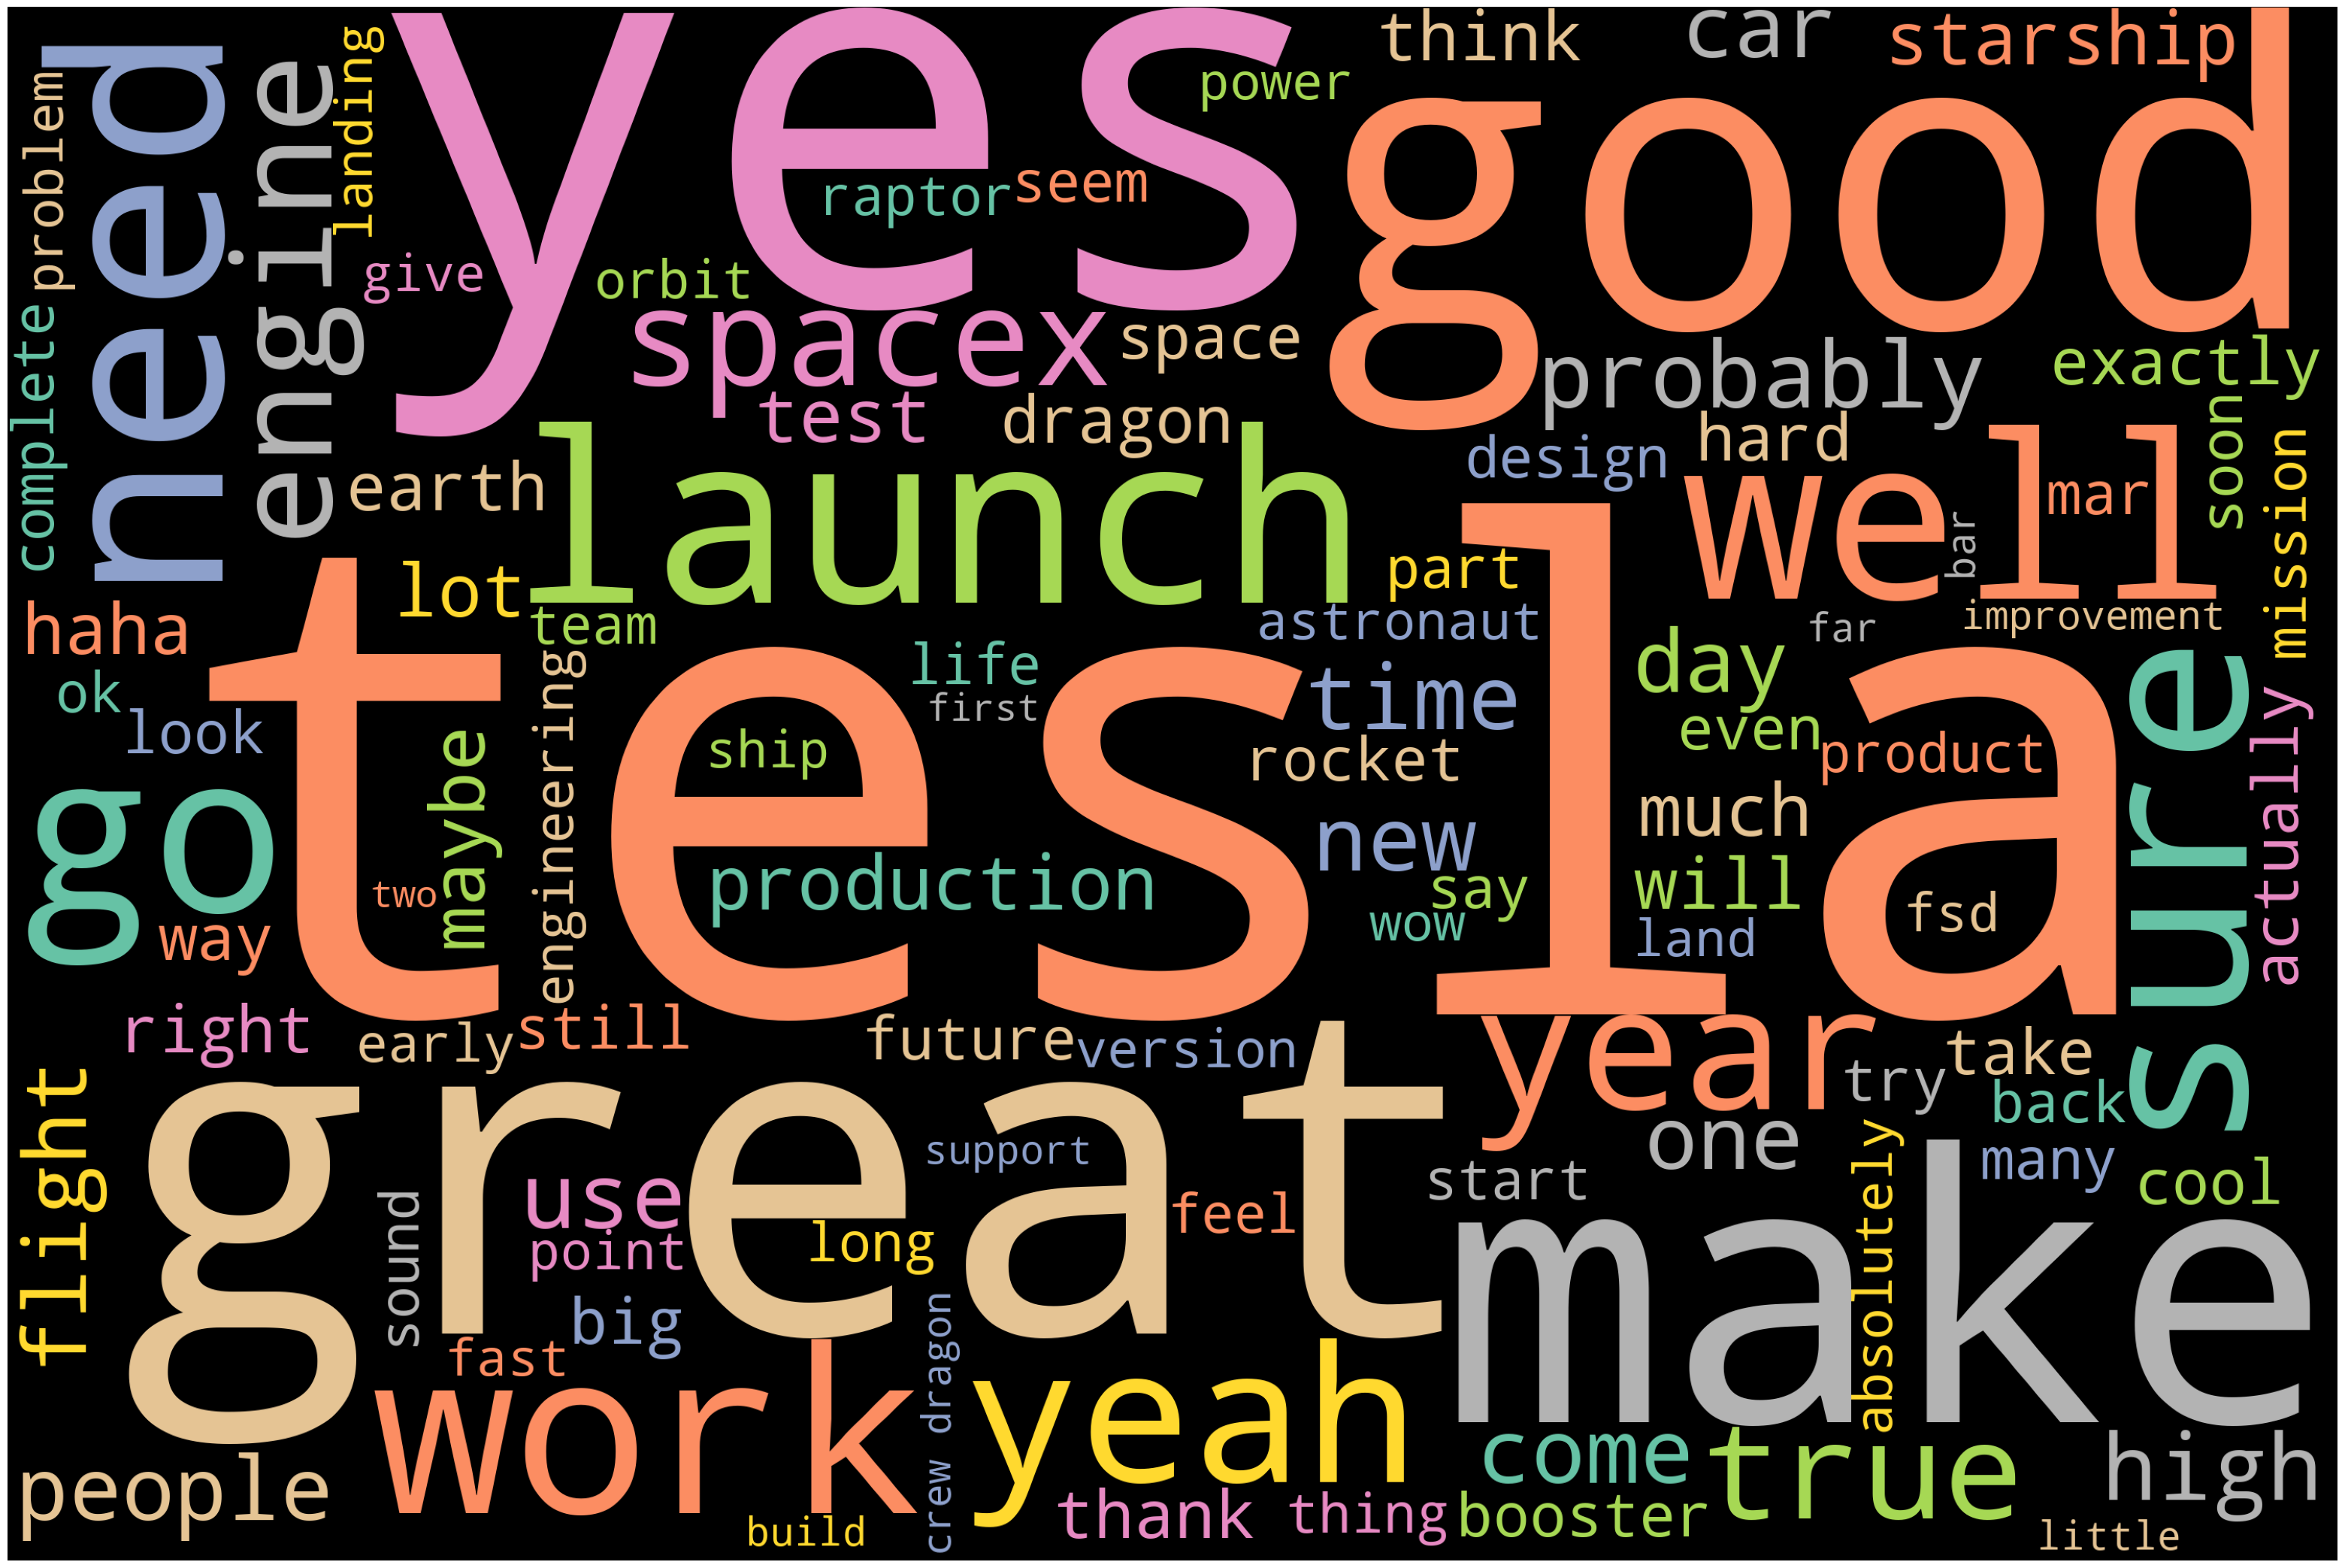

In [32]:
#Generate Word Cloud

from wordcloud import STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");
    
STOPWORDS.add('rt')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [33]:
#Named Entity Recognition
nlp = spacy.load('en_core_web_sm')
one_bloclk = clean_tweets
doc_block = nlp(one_bloclk)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [34]:
for token in doc_block[0:100]:
    print(token, token.pos_)

I PRON
alien ADJ
ray NOUN
trace NOUN
cyberpunk PROPN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge X
underestimate PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all PRON
think VERB
would AUX
fail VERB
himself PRON
haha PROPN
thank VERB
indeed ADV
tweet NOUN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse NOUN
it PRON
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil PROPN
x PROPN
toddler NOUN
hodler NOUN
he PRON
definitely ADV
issue VERB
sentencing NOUN
seem VERB
bit ADV
high ADJ
thank NOUN
fix NOUN
please INTJ
unlock VERB
account NOUN
this DET
true ADJ
power NOUN
any DET
crypto NOUN
wallet NOUN
give VERB
private ADJ
key ADJ
avoid NOUN
cost VERB
your PRON
app NOUN
suck PROPN
rt PROPN
nasa PROPN
select PROPN

In [35]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['ray', 'trace', 'nextlevel', 'try', 'interview', 'execution', 'year', 'year', 'ox', 'frodo', 'think', 'fail', 'thank', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'thank', 'fix', 'unlock', 'account', 'power', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'app', 'falcon', 'launch', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink']


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:20]

,word,count
0,launch,64
1,make,64
2,year,49
3,work,48
4,go,47
5,need,42
6,get,38
7,come,38
8,day,38
9,time,37


<AxesSubplot: title={'center': 'Top verbs and nouns'}, xlabel='word'>

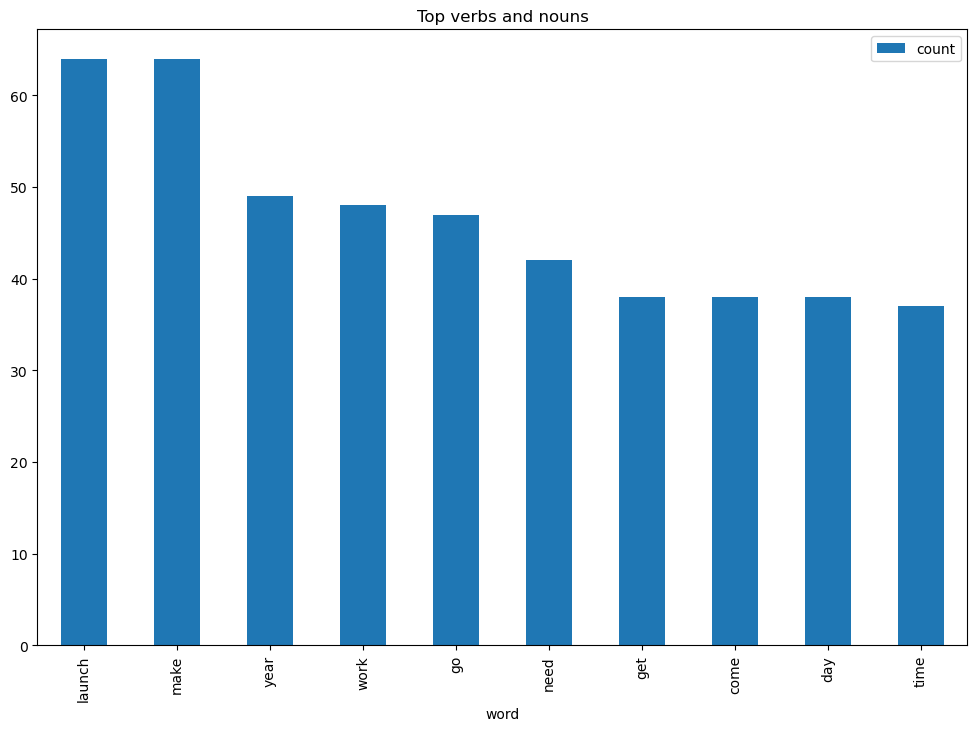

In [37]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [39]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets_data))
sentences[0:15]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [40]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [41]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [42]:
affin = pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [44]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [45]:
calculate_sentiment(text = 'super')

3

In [46]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
922    0
923   -4
924    0
925   -2
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [47]:
sent_df

,sentence,word_count,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
2,@joerogan @Spotify Great interview!,4,3
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3
4,Now on to the next for even more!!,8,0
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",11,0
923,"It may never pay out, as the stock cant b ht...",31,-4
924,Details Aug 28.,3,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,47,-2


In [48]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,word_count,sentiment_value
820,Might be able to https://t.co/FB7e5nOq2E @Pri...,72,11
161,@harsimranbansal @heydave7 It will most likely...,93,11
153,"@GUNMTLM3 @lexfridman No, but definitely this ...",45,11
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",98,12
81,@teslaownersSV This is a good one @MrBeastYT I...,38,13
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,65,13
588,The open areas https://t.co/rabjKrtQlw @Sav...,138,14
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,15
722,We just havent observed the https://t.co/mez...,72,15
105,@Erdayastronaut @SpaceX Was also thinking that...,94,16


In [49]:
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.365696
std        2.674782
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [50]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,word_count,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
4,Now on to the next for even more!!,8,0
5,Happy New Year of the Ox!,6,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,14,-2


In [51]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,word_count,sentiment_value,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0,0
1,Have you tried it?,4,0,1
2,@joerogan @Spotify Great interview!,4,3,2
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3,3
4,Now on to the next for even more!!,8,0,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",11,0,922
923,"It may never pay out, as the stock cant b ht...",31,-4,923
924,Details Aug 28.,3,0,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,47,-2,925


/var/folders/sn/m_zdvjj94hn_61p6s_2l246m0000gn/T/ipykernel_67294/126112002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<AxesSubplot: xlabel='sentiment_value', ylabel='Density'>

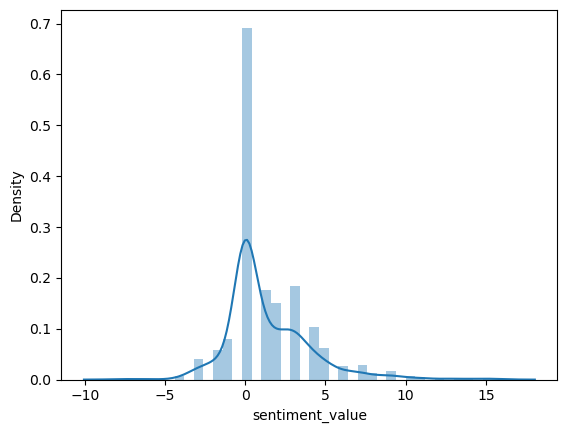

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot: xlabel='index', ylabel='sentiment_value'>

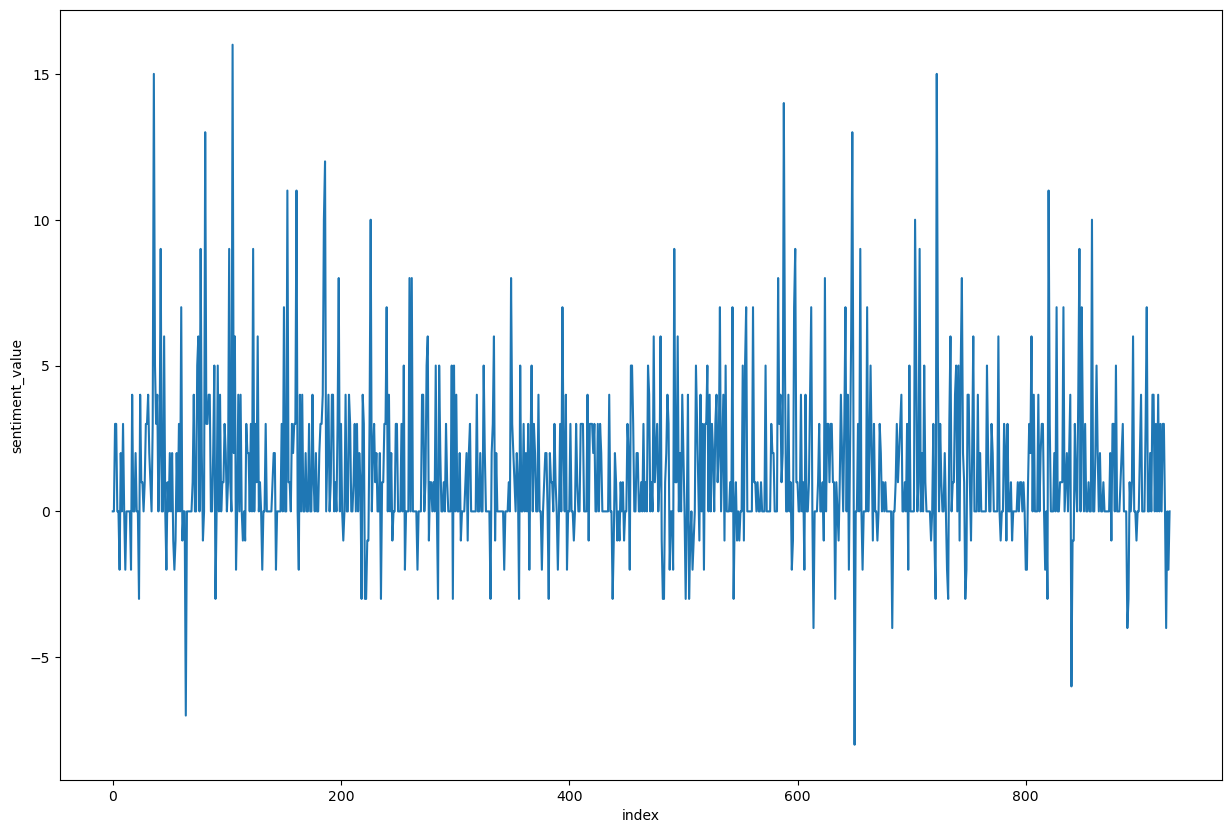

In [53]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

/Users/tarunvannelli/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

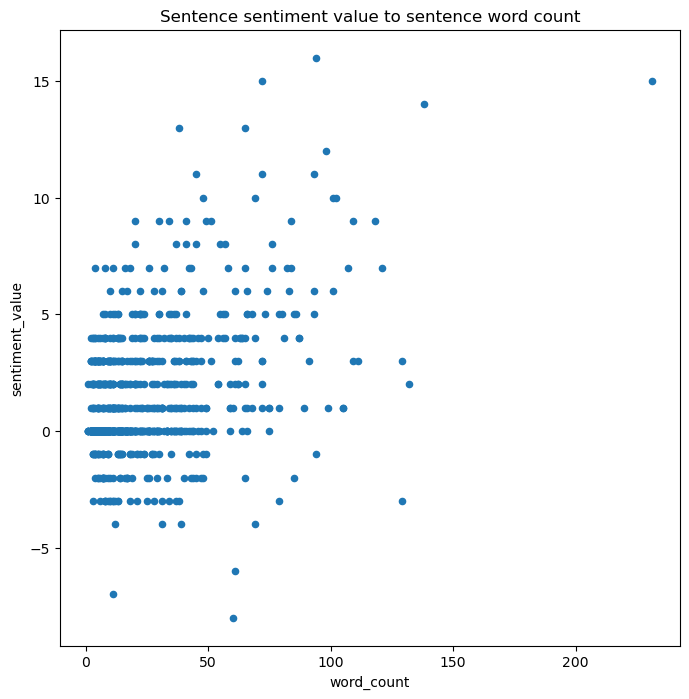

In [54]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [56]:
#checking for the raw data
tweets_data1 = tweets.drop(['Unnamed: 0'],axis=1)
tweets_data1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [57]:
tweets_data1['sentiment_value'] = tweets_data1['Text'].apply(calculate_sentiment) 
tweets_data1['sentiment_value']

0       0
1       0
2       3
3      -1
4       4
       ..
1994   -3
1995    1
1996    0
1997    0
1998    2
Name: sentiment_value, Length: 1999, dtype: int64

In [58]:
tweets_data1

,Text,sentiment_value
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated,-1
4,@teslacn Congratulations Tesla China for amazi...,4
...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3
1995,@PPathole Make sure to read ur terms &amp; con...,1
1996,@TeslaGong @PPathole Samwise Gamgee,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


In [59]:
tweets_data1.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value
1582,@teslaownersSV @Erdayastronaut Not perfectly a...,7
1420,@nextspaceflight Good chance something will sl...,7
1786,@flcnhvy @yourfavgas @ajtourville I really wan...,8
1966,@nichegamer I didnt mind DA2. DA1 was awesome...,8
1357,Great trip to Germany. Support from government...,10
468,@picot_john @CyberpunkGame Its a good to grea...,10
458,@teslaownerssv It will get absurdly good. Tesl...,10
1172,Thanks Tesla Team for great work on deliveries...,10
1304,"One way or another, excitement guaranteed! Sup...",11
1388,"@GerberKawasaki Wow, I super loved astronomy (...",12
